# The linear regression model based on continous target variable


## Importing the important python libraries and reading the csv dataset


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import joblib

In [2]:
df = pd.read_csv('zomato.csv')

In [3]:
df

,Unnamed: 0.1,Unnamed: 0,restaurant name,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type,area,local address
0,0,0,#FeelTheROLL,Quick Bites,3.4,7,200.0,No,No,Fast Food,Bellandur,Bellandur
1,1,1,#L-81 Cafe,Quick Bites,3.9,48,400.0,Yes,No,"Fast Food, Beverages","Byresandra,Tavarekere,Madiwala",HSR
2,2,2,#refuel,Cafe,3.7,37,400.0,Yes,No,"Cafe, Beverages",Bannerghatta Road,Bannerghatta Road
3,3,3,'@ Biryani Central,Casual Dining,2.7,135,550.0,Yes,No,"Biryani, Mughlai, Chinese",Marathahalli,Marathahalli
4,4,4,'@ The Bbq,Casual Dining,2.8,40,700.0,Yes,No,"BBQ, Continental, North Indian, Chinese, Bever...",Bellandur,Bellandur
...,...,...,...,...,...,...,...,...,...,...,...,...
7100,7100,7100,Zoey's,Cafe,4.3,894,600.0,Yes,No,"Cafe, Italian, Continental, Burger",Bellandur,Sarjapur Road
7101,7101,7101,ZOROY Luxury Chocolate,Dessert Parlor,4.0,68,250.0,Yes,No,Desserts,Brigade Road,Church Street
7102,7102,7102,Zu's Doner Kebaps,"Takeaway, Delivery",3.7,33,350.0,No,No,"Turkish, Fast Food, Biryani, Chinese",Malleshwaram,RT Nagar
7103,7103,7103,Zyara,Casual Dining,3.8,191,650.0,Yes,No,"North Indian, Mughlai, Chinese",Kammanahalli,HBR Layout


# Data Preprocessing and Cleaning

In [4]:
df.head()

,Unnamed: 0.1,Unnamed: 0,restaurant name,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type,area,local address
0,0,0,#FeelTheROLL,Quick Bites,3.4,7,200.0,No,No,Fast Food,Bellandur,Bellandur
1,1,1,#L-81 Cafe,Quick Bites,3.9,48,400.0,Yes,No,"Fast Food, Beverages","Byresandra,Tavarekere,Madiwala",HSR
2,2,2,#refuel,Cafe,3.7,37,400.0,Yes,No,"Cafe, Beverages",Bannerghatta Road,Bannerghatta Road
3,3,3,'@ Biryani Central,Casual Dining,2.7,135,550.0,Yes,No,"Biryani, Mughlai, Chinese",Marathahalli,Marathahalli
4,4,4,'@ The Bbq,Casual Dining,2.8,40,700.0,Yes,No,"BBQ, Continental, North Indian, Chinese, Bever...",Bellandur,Bellandur


In [5]:
df.tail()

,Unnamed: 0.1,Unnamed: 0,restaurant name,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type,area,local address
7100,7100,7100,Zoey's,Cafe,4.3,894,600.0,Yes,No,"Cafe, Italian, Continental, Burger",Bellandur,Sarjapur Road
7101,7101,7101,ZOROY Luxury Chocolate,Dessert Parlor,4.0,68,250.0,Yes,No,Desserts,Brigade Road,Church Street
7102,7102,7102,Zu's Doner Kebaps,"Takeaway, Delivery",3.7,33,350.0,No,No,"Turkish, Fast Food, Biryani, Chinese",Malleshwaram,RT Nagar
7103,7103,7103,Zyara,Casual Dining,3.8,191,650.0,Yes,No,"North Indian, Mughlai, Chinese",Kammanahalli,HBR Layout
7104,7104,7104,Zyksha,Food Truck,3.4,9,200.0,No,No,Fast Food,Bannerghatta Road,South Bangalore


In [6]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,rate (out of 5),num of ratings,avg cost (two people)
count,7105.000000,7105.000000,7037.000000,7105.000000,7048.000000
mean,3552.000000,3552.000000,3.514253,188.921042,540.286464
std,2051.181164,2051.181164,0.463249,592.171049,462.902305
min,0.000000,0.000000,1.800000,1.000000,40.000000
25%,1776.000000,1776.000000,3.200000,16.000000,300.000000
50%,3552.000000,3552.000000,3.500000,40.000000,400.000000
75%,5328.000000,5328.000000,3.800000,128.000000,600.000000
max,7104.000000,7104.000000,4.900000,16345.000000,6000.000000


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7105 entries, 0 to 7104
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0.1           7105 non-null   int64  
 1   Unnamed: 0             7105 non-null   int64  
 2   restaurant name        7105 non-null   object 
 3   restaurant type        7105 non-null   object 
 4   rate (out of 5)        7037 non-null   float64
 5   num of ratings         7105 non-null   int64  
 6   avg cost (two people)  7048 non-null   float64
 7   online_order           7105 non-null   object 
 8   table booking          7105 non-null   object 
 9   cuisines type          7105 non-null   object 
 10  area                   7105 non-null   object 
 11  local address          7105 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 666.2+ KB


In [8]:
df.isnull().sum()

Unnamed: 0.1              0
Unnamed: 0                0
restaurant name           0
restaurant type           0
rate (out of 5)          68
num of ratings            0
avg cost (two people)    57
online_order              0
table booking             0
cuisines type             0
area                      0
local address             0
dtype: int64

In [9]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'restaurant name', 'restaurant type',
       'rate (out of 5)', 'num of ratings', 'avg cost (two people)',
       'online_order', 'table booking', 'cuisines type', 'area',
       'local address'],
      dtype='object')

In [10]:
df = df.dropna()

In [11]:
remaining_null_values = df.isnull().sum()
df_shape = df.shape
df_shape, remaining_null_values

((6984, 12),
 Unnamed: 0.1             0
 Unnamed: 0               0
 restaurant name          0
 restaurant type          0
 rate (out of 5)          0
 num of ratings           0
 avg cost (two people)    0
 online_order             0
 table booking            0
 cuisines type            0
 area                     0
 local address            0
 dtype: int64)

In [12]:
df.head()

,Unnamed: 0.1,Unnamed: 0,restaurant name,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type,area,local address
0,0,0,#FeelTheROLL,Quick Bites,3.4,7,200.0,No,No,Fast Food,Bellandur,Bellandur
1,1,1,#L-81 Cafe,Quick Bites,3.9,48,400.0,Yes,No,"Fast Food, Beverages","Byresandra,Tavarekere,Madiwala",HSR
2,2,2,#refuel,Cafe,3.7,37,400.0,Yes,No,"Cafe, Beverages",Bannerghatta Road,Bannerghatta Road
3,3,3,'@ Biryani Central,Casual Dining,2.7,135,550.0,Yes,No,"Biryani, Mughlai, Chinese",Marathahalli,Marathahalli
4,4,4,'@ The Bbq,Casual Dining,2.8,40,700.0,Yes,No,"BBQ, Continental, North Indian, Chinese, Bever...",Bellandur,Bellandur


In [13]:
df.shape

(6984, 12)

In [14]:
df=df.drop(columns='Unnamed: 0.1')
df=df.drop(columns='Unnamed: 0')
df.head()

,restaurant name,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type,area,local address
0,#FeelTheROLL,Quick Bites,3.4,7,200.0,No,No,Fast Food,Bellandur,Bellandur
1,#L-81 Cafe,Quick Bites,3.9,48,400.0,Yes,No,"Fast Food, Beverages","Byresandra,Tavarekere,Madiwala",HSR
2,#refuel,Cafe,3.7,37,400.0,Yes,No,"Cafe, Beverages",Bannerghatta Road,Bannerghatta Road
3,'@ Biryani Central,Casual Dining,2.7,135,550.0,Yes,No,"Biryani, Mughlai, Chinese",Marathahalli,Marathahalli
4,'@ The Bbq,Casual Dining,2.8,40,700.0,Yes,No,"BBQ, Continental, North Indian, Chinese, Bever...",Bellandur,Bellandur


# Removing the possible outliers 

Text(0.5, 1.0, 'Box Plot of avg cost')

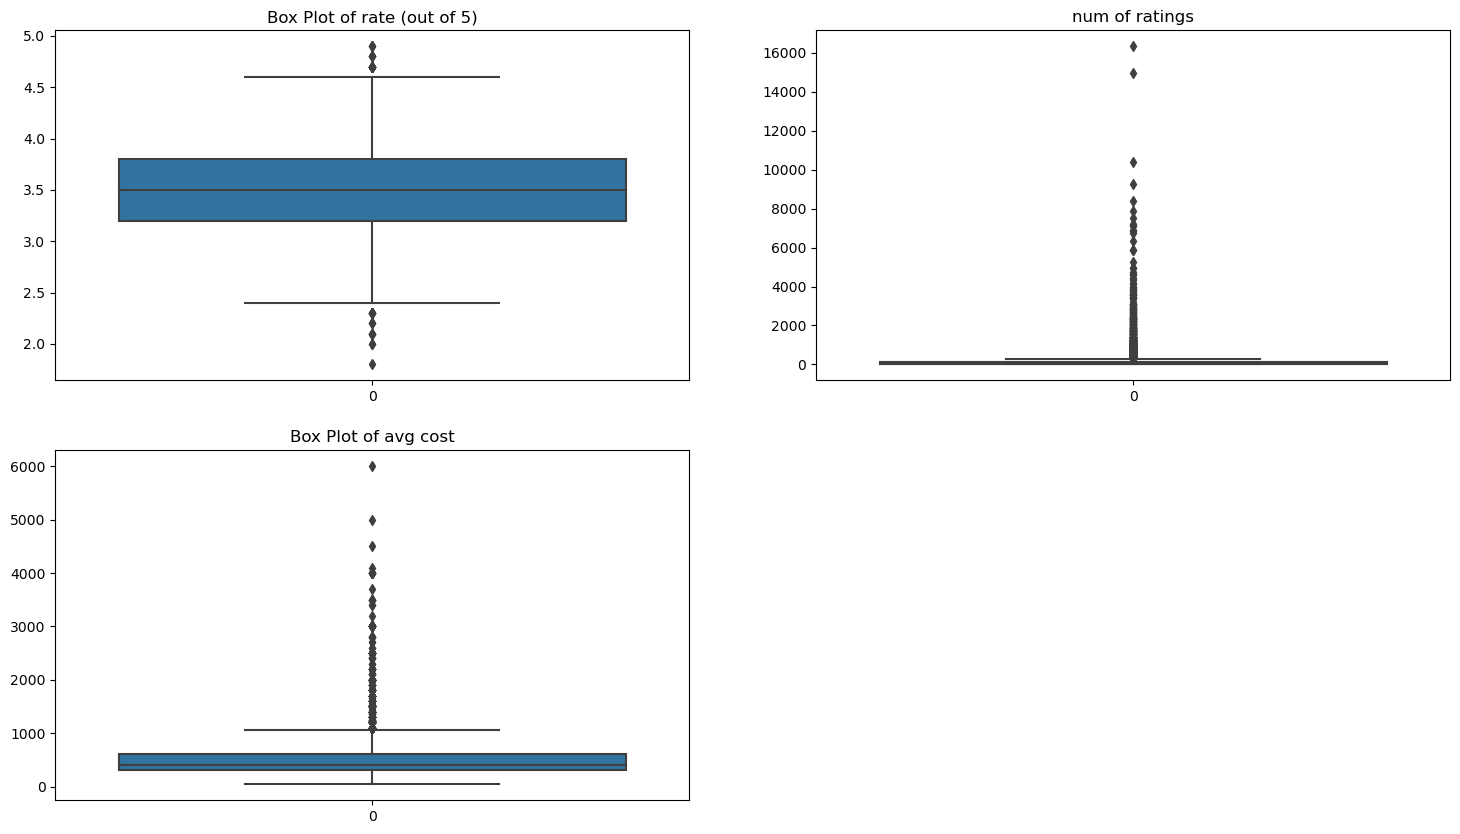

In [15]:
plt.figure(figsize=(18,10))

plt.subplot(2,2,1)
sns.boxplot(df['rate (out of 5)'])
plt.title('Box Plot of rate (out of 5)')

plt.subplot(2,2,2)
sns.boxplot(df['num of ratings'])
plt.title('num of ratings')

plt.subplot(2,2,3)
sns.boxplot(df['avg cost (two people)'])
plt.title('Box Plot of avg cost')


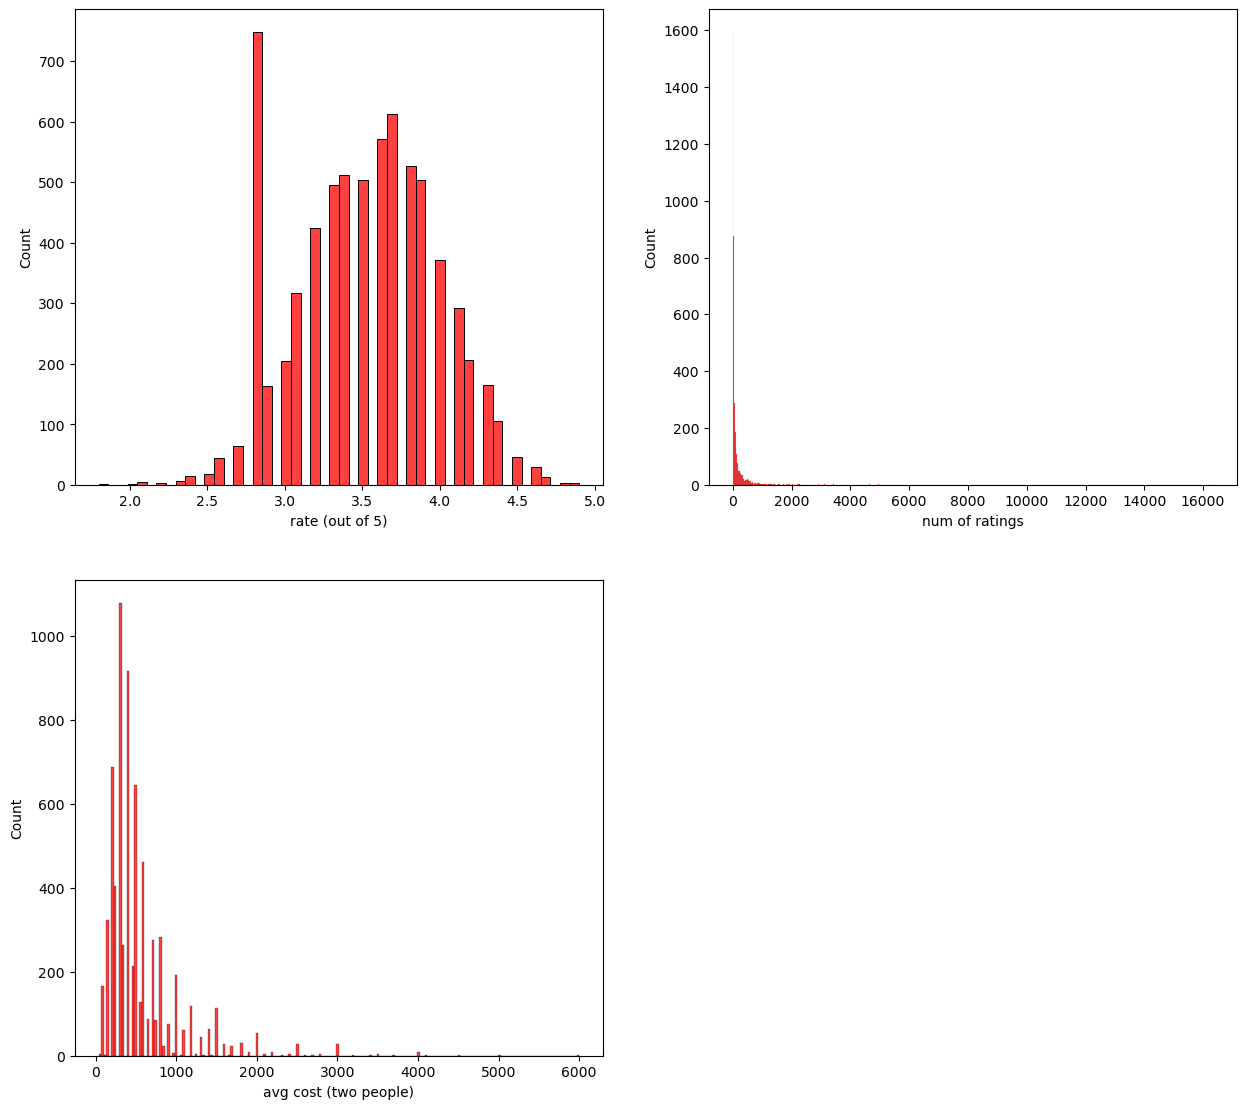

In [16]:
plt.figure(figsize=(15,21))
for i,col in enumerate(['rate (out of 5)','num of ratings','avg cost (two people)']):
    plt.subplot(3,2,i+1)
    sns.histplot(data=df,x=col,color='red')

In [17]:
Q1_rate=df['rate (out of 5)'].quantile(0.25)
Q3_rate= df['rate (out of 5)'].quantile(0.75)
IQR_rate=Q3_rate-Q1_rate
print(IQR_rate)
lower_bound=Q1_rate - 1.5*IQR_rate
upper_bound=Q3_rate + 1.5*IQR_rate
df=df[(df['rate (out of 5)']>= lower_bound)&(df['rate (out of 5)']<= upper_bound)]

0.5999999999999996


In [18]:
Q1_num=df['num of ratings'].quantile(0.25)
Q3_num= df['num of ratings'].quantile(0.75)
IQR_num=Q3_num-Q1_num
print(IQR_num)
lower_bound1=Q1_num - 1.5*IQR_num
upper_bound1=Q3_num + 1.5*IQR_num
df=df[(df['num of ratings']>= lower_bound1)&(df['num of ratings']<= upper_bound1)]

112.0


In [19]:
Q1_avg=df['avg cost (two people)'].quantile(0.25)
Q3_avg= df['avg cost (two people)'].quantile(0.75)
IQR_avg=Q3_avg-Q1_avg
print(IQR_avg)
lower_bound2=Q1_avg - 1.5*IQR_avg
upper_bound2=Q3_avg + 1.5*IQR_avg
df=df[(df['avg cost (two people)']>= lower_bound2)&(df['avg cost (two people)']<= upper_bound2)]

300.0


In [20]:
new_shape=df.shape
new_shape

(5731, 10)

# Insight after remvoing the outliers

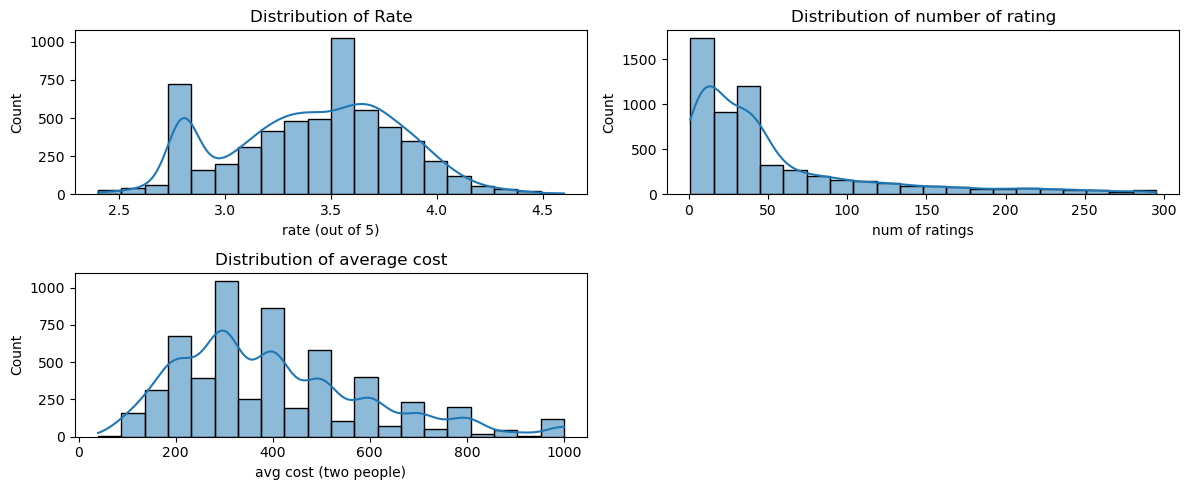

In [21]:
plt.figure(figsize=(12,5))
#distribution of Age and Fare after cleaning
plt.subplot(2,2,1)
sns.histplot(df['rate (out of 5)'], bins=20, kde=True)
plt.title('Distribution of Rate')

plt.subplot(2,2,2)
sns.histplot(df['num of ratings'], bins=20, kde=True)
plt.title('Distribution of number of rating')

plt.subplot(2,2,3)
sns.histplot(df['avg cost (two people)'], bins=20, kde=True)
plt.title('Distribution of average cost')

plt.tight_layout()
plt.show()

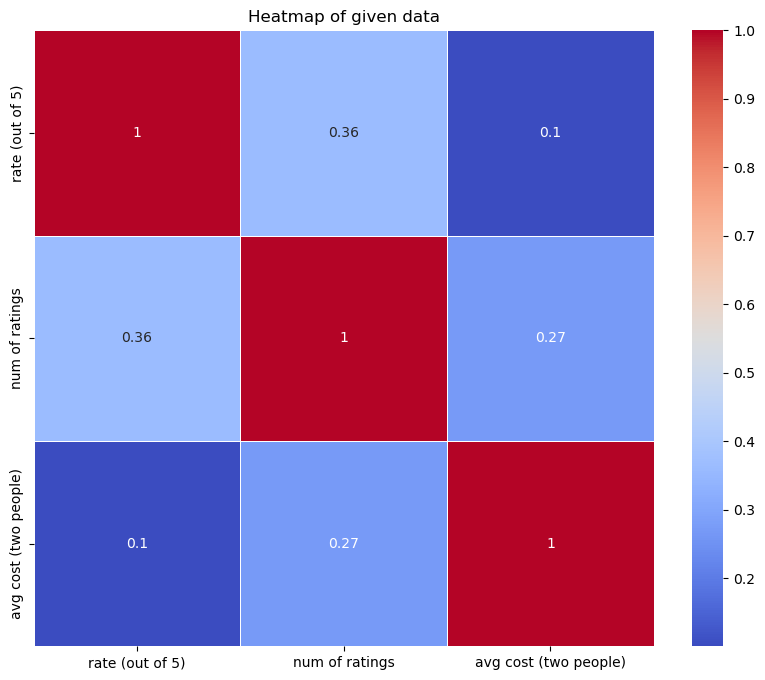

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidth=0.5)
plt.title('Heatmap of given data')
plt.show()

# Encoding the categorical variables

In [23]:
print(df['online_order'].unique())
print(df['table booking'].unique())
print(df['restaurant name'].unique())

['No' 'Yes']
['No' 'Yes']
['#FeelTheROLL' '#L-81 Cafe' '#refuel' ... "Zu's Doner Kebaps" 'Zyara'
 'Zyksha']


In [24]:
df['online_order'] = df['online_order'].str.strip().str.capitalize()
df['table booking'] = df['table booking'].str.strip().str.capitalize()


In [25]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df['online_order']=df['online_order'].map({'Yes':1,'No':0})
df['table booking']=df['table booking'].map({'Yes':1,'No':0})

In [26]:
df.head()

,restaurant name,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type,area,local address
0,#FeelTheROLL,Quick Bites,3.4,7,200.0,0,0,Fast Food,Bellandur,Bellandur
1,#L-81 Cafe,Quick Bites,3.9,48,400.0,1,0,"Fast Food, Beverages","Byresandra,Tavarekere,Madiwala",HSR
2,#refuel,Cafe,3.7,37,400.0,1,0,"Cafe, Beverages",Bannerghatta Road,Bannerghatta Road
3,'@ Biryani Central,Casual Dining,2.7,135,550.0,1,0,"Biryani, Mughlai, Chinese",Marathahalli,Marathahalli
4,'@ The Bbq,Casual Dining,2.8,40,700.0,1,0,"BBQ, Continental, North Indian, Chinese, Bever...",Bellandur,Bellandur


# Split the Data into Training and Testing Sets

In [27]:
X = df.drop(columns=['rate (out of 5)', 'restaurant name', 'restaurant type','area', 'cuisines type', 'local address'])
y = df['rate (out of 5)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
X_train.shape, X_test.shape

((4584, 4), (1147, 4))

# Applying the linear regression model

In [29]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [30]:
y_pred = model.predict(X_test)

In [31]:
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
mse, rmse, r2

NameError: name 'r2_score' is not defined

# Insight to get better view of predicted and actual ratings

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(y_test.values[:100], label='Actual Ratings', marker='o')
plt.plot(y_pred[:100], label='Predicted Ratings', marker='x')
plt.title('Actual vs Predicted Ratings')
plt.xlabel('Sample Index')
plt.ylabel('Rating (out of 5)')
plt.legend()
plt.show()

In [ ]:
coef = pd.Series(model.coef_, index=X.columns)
print(coef.sort_values(ascending=False))

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.show()

In [ ]:
joblib.dump(model, 'linear_regression_model.pkl')